In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import base
import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [3]:
df = pd.read_csv('cars.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,113 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,White,First,Individual,1197 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2037,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,White,Second,Individual,2179 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2038,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Silver,First,Individual,814 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2039,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,White,First,Individual,1196 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [4]:
df["TorquePower"] = [None if str(i) == "nan" else int(i.split("@")[0]) if len(i.split(" ")) == 1 else int(i.split(" ")[0]) for i in df["Max Torque"]]
df["TorquePowerRPM"] = [None if str(i) == "nan" else int(i.split("@")[1]) if len(i.split(" ")) == 1 else int(i.split(" ")[-2]) for i in df["Max Torque"]]
df["HorsePower"] = [None if str(i) == "nan" else int(i.split("@")[0]) if len(i.split(" ")) == 1 else int(i.split(" ")[0]) for i in df["Max Power"]]
df["HorsePowerRPM"] = [None if str(i) == "nan" else int(i.split("@")[1]) if len(i.split(" ")) == 1 else int(i.split(" ")[-2]) for i in df["Max Power"]]
df["Engine"] = [None if str(i) == "nan" else int(i.split(" ")[0]) for i in df["Engine"]]

In [5]:
df.drop(["Max Power","Max Torque"], axis=1, inplace=True)

In [6]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Color', 'Owner', 'Seller Type', 'Engine', 'Drivetrain',
       'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity',
       'TorquePower', 'TorquePowerRPM', 'HorsePower', 'HorsePowerRPM'],
      dtype='object')

In [7]:
df.shape

(2041, 21)

In [8]:
#remove leading and trailing whitespaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2041 non-null   object 
 1   Model               2041 non-null   object 
 2   Price               2041 non-null   int64  
 3   Year                2041 non-null   int64  
 4   Kilometer           2041 non-null   int64  
 5   Fuel Type           2041 non-null   object 
 6   Transmission        2041 non-null   object 
 7   Color               2041 non-null   object 
 8   Owner               2041 non-null   object 
 9   Seller Type         2041 non-null   object 
 10  Engine              1961 non-null   float64
 11  Drivetrain          1907 non-null   object 
 12  Length              1977 non-null   float64
 13  Width               1977 non-null   float64
 14  Height              1977 non-null   float64
 15  Seating Capacity    1977 non-null   float64
 16  Fuel T

In [10]:
df.duplicated().sum()

4

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

Make                    33
Model                 1040
Price                  618
Year                    22
Kilometer              838
Fuel Type                9
Transmission             2
Color                   17
Owner                    6
Seller Type              3
Engine                 106
Drivetrain               3
Length                 247
Width                  169
Height                 195
Seating Capacity         6
Fuel Tank Capacity      55
TorquePower            135
TorquePowerRPM          56
HorsePower             164
HorsePowerRPM           41
dtype: int64

In [14]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Price,2037.0,1.712048e+06,2.428895e+06,49000.0,490000.0,840000.0,1950000.0,35000000.0
Year,2037.0,2.016450e+03,3.356670e+00,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2037.0,5.423052e+04,5.756971e+04,0.0,29000.0,50000.0,72000.0,2000000.0
Engine,1957.0,1.695427e+03,6.448259e+02,624.0,1198.0,1498.0,1995.0,6592.0
Length,1973.0,4.284451e+03,4.422232e+02,3099.0,3985.0,4370.0,4630.0,5569.0
Width,1973.0,1.768817e+03,1.354341e+02,1475.0,1695.0,1775.0,1835.0,2220.0
Height,1973.0,1.592482e+03,1.364171e+02,1165.0,1485.0,1548.0,1678.0,1995.0
Seating Capacity,1973.0,5.310694e+00,8.251081e-01,2.0,5.0,5.0,5.0,8.0
Fuel Tank Capacity,1925.0,5.211236e+01,1.514309e+01,15.0,42.0,50.0,60.0,105.0
TorquePower,1957.0,2.466224e+02,1.405952e+02,48.0,115.0,200.0,350.0,780.0


In [15]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

,count,unique,top,freq
Make,2037,33,Maruti Suzuki,438
Model,2037,1040,X1 sDrive20d xLine,15
Fuel Type,2037,9,Diesel,1043
Transmission,2037,2,Manual,1117
Color,2037,17,White,793
Owner,2037,6,First,1602
Seller Type,2037,3,Individual,1975
Drivetrain,1903,3,FWD,1311


In [16]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Color,0
Owner,0
Seller Type,0


In [17]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,TorquePower,TorquePowerRPM,HorsePower,HorsePowerRPM
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Grey,First,Corporate,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,109.0,4500.0,87.0,6000.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,White,Second,Individual,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,190.0,2000.0,74.0,4000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Maroon,First,Individual,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,113.0,4000.0,79.0,6000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Red,First,Individual,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,113.0,4200.0,82.0,6000.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Grey,First,Individual,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,343.0,1400.0,148.0,3400.0


In [18]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Color', 'Owner', 'Seller Type', 'Engine', 'Drivetrain',
       'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity',
       'TorquePower', 'TorquePowerRPM', 'HorsePower', 'HorsePowerRPM'],
      dtype='object')

In [19]:
X = df.drop(columns=['Model','Price'],axis=1)

In [20]:
X.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,TorquePower,TorquePowerRPM,HorsePower,HorsePowerRPM
0,Honda,2017,87150,Petrol,Manual,Grey,First,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,109.0,4500.0,87.0,6000.0
1,Maruti Suzuki,2014,75000,Diesel,Manual,White,Second,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,190.0,2000.0,74.0,4000.0
2,Hyundai,2011,67000,Petrol,Manual,Maroon,First,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,113.0,4000.0,79.0,6000.0
3,Toyota,2019,37500,Petrol,Manual,Red,First,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,113.0,4200.0,82.0,6000.0
4,Toyota,2018,69000,Diesel,Manual,Grey,First,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,343.0,1400.0,148.0,3400.0


In [21]:
X.shape

(2037, 19)

In [22]:
y = df['Price']

In [23]:
y.head()

0     505000
1     450000
2     220000
3     799000
4    1950000
Name: Price, dtype: int64

In [24]:
#Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X[cat_features] = X[cat_features].fillna(df[cat_features].mean())
X[num_features] = X[num_features].fillna(df[num_features].mode().iloc[0])
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features)
    ]
)
X_preprocessed = preprocessor.fit_transform(X)


In [25]:
X_preprocessed

<2037x86 sparse matrix of type '<class 'numpy.float64'>'
	with 38703 stored elements in Compressed Sparse Row format>

In [26]:
X = preprocessor.fit_transform(X)

In [27]:
X

<2037x86 sparse matrix of type '<class 'numpy.float64'>'
	with 38703 stored elements in Compressed Sparse Row format>

In [28]:
X.shape

(2037, 86)

In [29]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1629, 86), (408, 86))

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

param_grids = {
    "Lasso": {
        'alpha': [0.001, 0.01, 0.1, 1.0]
    },
    "Ridge": {
        'alpha': [0.001, 0.01, 0.1, 1.0]
    },
    "K-Neighbors Regressor": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest Regressor": {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10]
    },
    "XGBRegressor": {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10]
    },
    "CatBoosting Regressor": {
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
    },
    "AdaBoost Regressor": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

model_list = []
r2_list =[]
rmse_list = []
cv = KFold(n_splits=3, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}")
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        model_train_mse = mean_squared_error(y_train, y_train_pred)
        model_test_mse = mean_squared_error(y_test, y_test_pred)
        
        model_train_rmse = np.sqrt(model_train_mse)
        model_test_rmse = np.sqrt(model_test_mse)
        
        model_train_r2 = best_model.score(X_train, y_train)
        model_test_r2 = best_model.score(X_test, y_test)
      
        rmse_list.append(model_test_rmse)

        r2_list.append(model_test_r2)
        model_list.append(model_name)

        print("Best hyperparameters:", best_params)
        
        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- R2 Score: {:.4f}".format(model_train_r2))
        
        print('----------------------------------')
        
        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        
        print('='*35)
        print('\n')




Tuning hyperparameters for Linear Regression
Tuning hyperparameters for Lasso
Best hyperparameters: {'alpha': 0.001}
Model performance for Training set
- Root Mean Squared Error: 1120268.6409
- R2 Score: 0.7769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1751529.6322
- R2 Score: 0.5605


Tuning hyperparameters for Ridge
Best hyperparameters: {'alpha': 0.1}
Model performance for Training set
- Root Mean Squared Error: 1121629.7350
- R2 Score: 0.7763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1668760.1289
- R2 Score: 0.6011


Tuning hyperparameters for K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Model performance for Training set
- Root Mean Squared Error: 1030.3855
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1271099.2738
- R2 Score: 0.7686


Tuning hyperparameters for Decision Tree

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,K-Neighbors Regressor,0.768558
6,CatBoosting Regressor,0.745228
4,Random Forest Regressor,0.742820
7,AdaBoost Regressor,0.722074
5,XGBRegressor,0.674749
1,Ridge,0.601093
3,Decision Tree,0.600357
0,Lasso,0.560541


In [33]:
lin_model = DecisionTreeRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 81.46


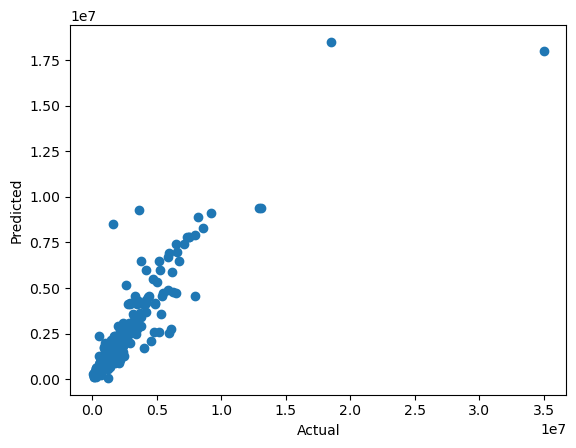

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

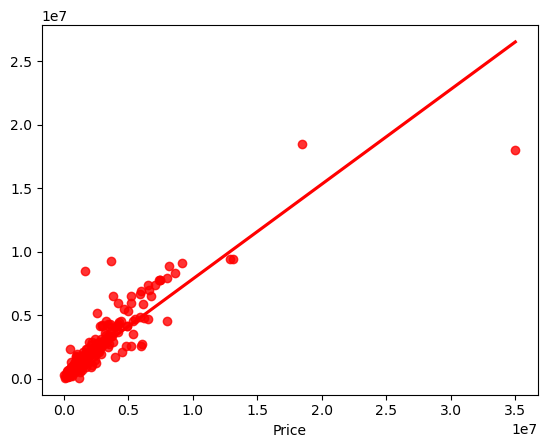

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
753,3775000,3400000.0,375000.0
111,1400000,1750000.0,-350000.0
520,625000,585000.0,40000.0
536,455000,480000.0,-25000.0
964,650000,625000.0,25000.0
...,...,...,...
1075,250000,235000.0,15000.0
1310,1190000,1221000.0,-31000.0
1305,590000,590000.0,0.0
421,2900000,2550000.0,350000.0


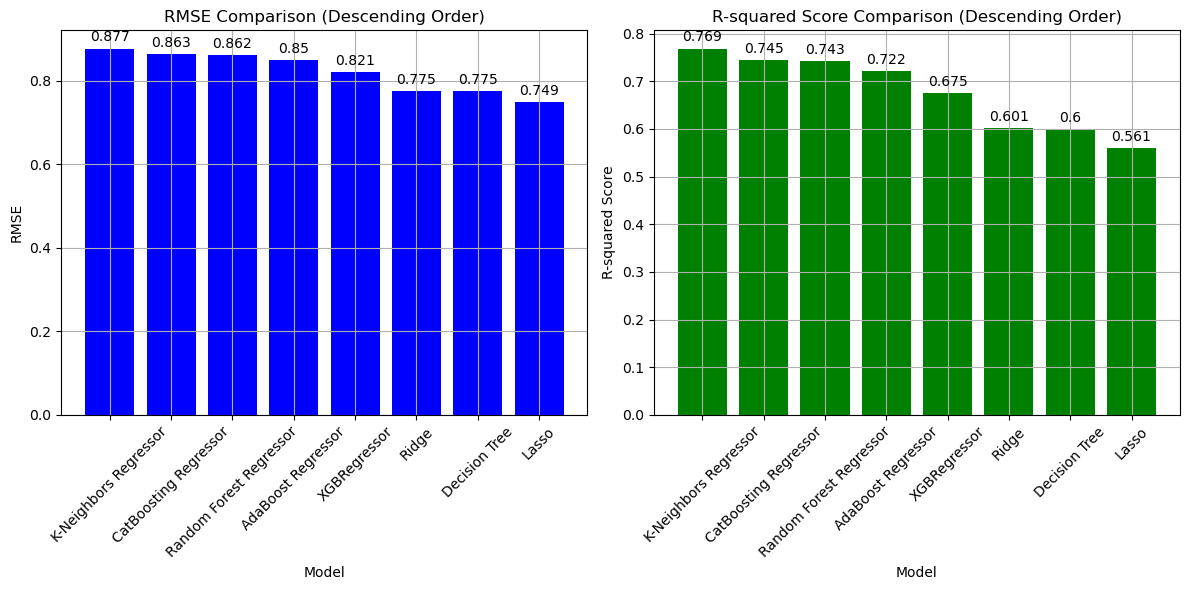

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained and evaluated your models
model_names = model_list  # List of model names
rmse_scores = [np.sqrt(mse) for mse in r2_list]  # RMSE scores for test set
r2_scores = r2_list  # R-squared scores for test set

# Sort models based on RMSE scores in descending order
sorted_indices_rmse = np.argsort(rmse_scores)[::-1]
sorted_model_names_rmse = [model_names[i] for i in sorted_indices_rmse]
sorted_rmse_scores = [rmse_scores[i] for i in sorted_indices_rmse]
sorted_r2_scores = [r2_scores[i] for i in sorted_indices_rmse]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# RMSE Comparison
rmse_bars = axes[0].bar(sorted_model_names_rmse, sorted_rmse_scores, color='blue')
axes[0].set_title('RMSE Comparison (Descending Order)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Annotate RMSE values on bars
for bar, rmse_score in zip(rmse_bars, sorted_rmse_scores):
    yval = bar.get_height()
    axes[0].annotate(f'{round(rmse_score, 3)}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# R2 Score Comparison (RMSE Order)
r2_bars = axes[1].bar(sorted_model_names_rmse, sorted_r2_scores, color='green')
axes[1].set_title('R-squared Score Comparison (Descending Order)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R-squared Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Annotate R2 values on bars
for bar, r2_score in zip(r2_bars, sorted_r2_scores):
    yval = bar.get_height()
    axes[1].annotate(f'{round(r2_score, 3)}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


